# Boston House Prices Dataset - An Investigation

## Introduction

The Boston Housing Data consists of information collected by the US Census Service on housing in the Boston, Massachusetts area in 1970 and contains [506 entries with 13 distinct categories](https://www.kaggle.com/c/boston-housing) and one predictor variable of numerical data. Each row in the dataset relates to a suburb in the Boston area and contains statistics unique to that suburb. After doing some background reading about the data set I discovered that it is included in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), the Python machine learning library, and can therefore be easily imported into this notebook to anaylse. 

In [72]:
#Importing dataset
from sklearn.datasets import load_boston ##https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
boston = load_boston()

#import the other libraries and packages required to analyse the dataset
#for plotting graphs
import matplotlib.pyplot as plt
#for working with numerical arrays
import numpy as np
#for data visualisation
import seaborn as sns
#for statistical functions
import scipy.stats as ss
#for handling data
import pandas as pd
#"magic" code for displaying matplotlib generated plots in jupyter
%matplotlib inline
#for creating neural networks 
import keras as kr
#for splitting datasets
import sklearn.model_selection as mod
# For preprocessing data
import sklearn.preprocessing as pre

To take a first look at the data set we can use the below commands to ascertain the categories it holds and the characteristics of the data. 

In [2]:
print (boston.keys()) #https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print (boston.DESCR) #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

From the above detail it is made clear that there is a 14th "target" variable named **MEDV**, which is the "median value of owner-occupied homes in $1,000's".  The information listed above also verifies that there is no missing data in any of the attribute fields, which means that the data doesn't need to cleaned before any exploratory analysis can be performed, but to be certain, loading the data to a Pandas dataframe and using the **isnull()** function will confirm that - 

In [4]:
#load Boston dataset into Pandas dataframe https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
df = pd.DataFrame(boston.data, columns=boston.feature_names)
#http://www.neural.cz/dataset-exploration-boston-house-pricing.html
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [183]:
#https://www.kaggle.com/solegalli/feature-engineering-for-house-price-modelling
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


## Describe
Descriptive statistics give a simple summary of a data set, and include such observations as the count, [standard deviation, minimum, maximum and mean](https://en.wikipedia.org/wiki/Descriptive_statistics) for example. This type of statistics doesn't make any assumptions about the data, rather it is a method by which to synopsise and describe it.  One way of finding out these sorts of observations about the Boston dataset is by using the Pandas [describe function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html). With this function it is possible to summarise all columns and calculate some of these statistics - 

In [5]:
#summarise dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


All of the so-called [13 "feature" attributes](https://www.kaggle.com/shreayan98c/boston-house-price-prediction) have been automatically included in the above dataframe. In order to understand the MEDV variable it is necessary to generate it as the "target" value add it as a new column to the dataframe. 

In [6]:
#code borrowed from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
df["MEDV"] = boston.target #defines the MEDV column of the dataframe
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()#show first 5 rows of dataframe 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In order to better understand the data and any notable relationships it holds, I decided to utilise [Pandas in-built correlation coefficients](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) function to ascertain what statistical relationships exist between the variables - 

In [7]:
df.corr()#calculates correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


To make this correlation matrix more accessible I thought it would be useful to plot it using Seaborn's heatmap to graphically represent these relationships, as recommended by [Abhini Shetye in her towardsdatascience.com blogpost - ](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

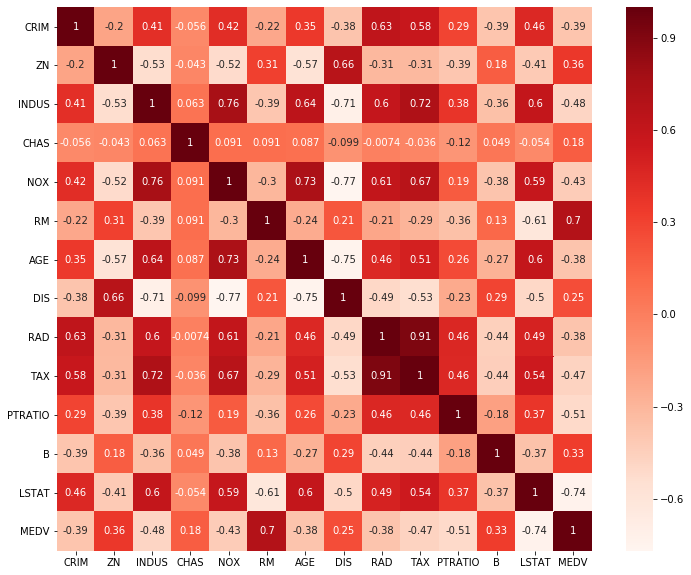

In [8]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(12,10))#sets size of graph
cor = df.corr() #defines variable called cor that consists of correlation coefficients of dataframe
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)#calls Seaborn to graph a heatmap
plt.show()#calls Pyplot to show heatmap

The strongest correlation with the target variable according to the above graph is with "RM", and there are strong negative correlations with "LSTAT" and "PTRATIO".  The variable with the least correlation to the target is "CHAS". To better describe the relationship between these attributes I decided to generate some [pairplots](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to visualise how they interact with each other, as well as to determine the distributions of each feature.

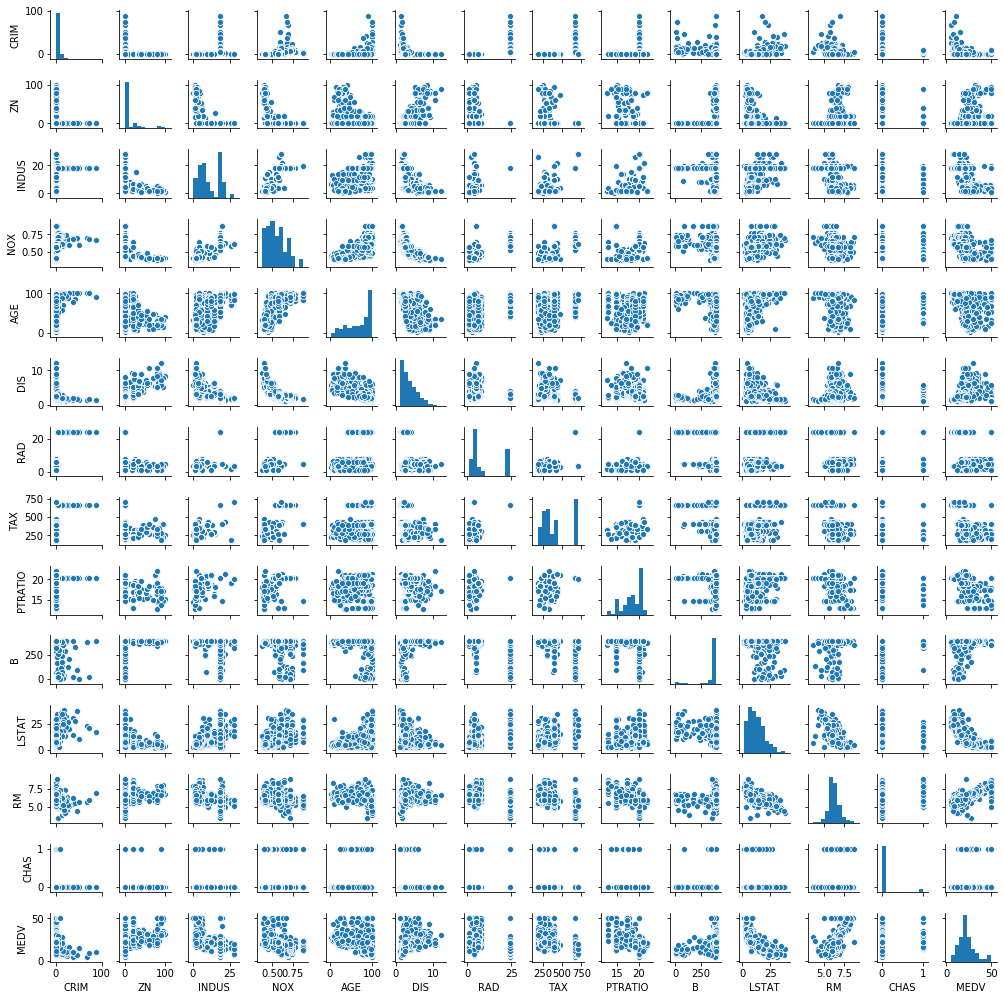

In [221]:
#plots a Seaborn pairplot of all variables from dataset
sns.pairplot(df, vars=["CRIM", "ZN", "INDUS", "NOX", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "RM", "CHAS", "MEDV"], height=1)

We can see that the target variable - MEDV - is normally distributed with some outliers, as per the histogram in the bottom left of the above graph. We can also see that the RM variable is the only other variable with a shape close to a normal distribution, and that LSTAT is right-skewed, while age is left-skewed. The distribution of the CHAS variable is split between 2 points on the x axis, 1 and 0. 

It is possible to also use the [describe function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.describe.html?highlight=descriptive) from scipy.stats to outline some descriptive statistics of the Boston data.  This function computes the size of the data (nobs), the min and max, the kurtosis([measure that describes the distribution](https://www.investopedia.com/terms/k/kurtosis.asp), the skewness([where the curve in a distribution appears distorted or skews to the left or right](https://whatis.techtarget.com/definition/skewness)), the mean and the variance([measures how far each number in the set is from the mean and therefore from every other number in the set](https://www.investopedia.com/terms/v/variance.asp) of each variable in the data set and returns this information in an array - 

In [10]:
from scipy.stats.mstats import describe #imports scipy stats package
describe(df)#returns descriptive statistics of dataframe

C:\Users\Aideen and Ken\Anaconda\lib\site-packages\scipy\stats\mstats_basic.py:2300: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))
C:\Users\Aideen and Ken\Anaconda\lib\site-packages\scipy\stats\mstats_basic.py:2300: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))


DescribeResult(nobs=array([506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506,
       506], dtype=int64), minmax=(masked_array(data=0.,
             mask=False,
       fill_value=1e+20), masked_array(data=711.,
             mask=False,
       fill_value=1e+20)), mean=masked_array(data=[3.61352356e+00, 1.13636364e+01, 1.11367787e+01,
                   6.91699605e-02, 5.54695059e-01, 6.28463439e+00,
                   6.85749012e+01, 3.79504269e+00, 9.54940711e+00,
                   4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
                   1.26530632e+01, 2.25328063e+01],
             mask=False,
       fill_value=1e+20), variance=masked_array(data=[7.38403597e+01, 5.42861840e+02, 4.69714297e+01,
                   6.43854770e-02, 1.34010989e-02, 4.92695216e-01,
                   7.90792473e+02, 4.42525226e+00, 7.56665313e+01,
                   2.83486236e+04, 4.67772630e+00, 8.31828042e+03,
                   5.08939794e+01, 8.44195562e+01],
             mask=F

## Infer
Inferential statistics differ from descriptive statistics in that rather than summarise the data, they are used to prove, or infer, certain theories about it - for example, [testing a hyopthesis and using a sample of a population to infer a characteristic of that population](https://www.mymarketresearchmethods.com/descriptive-inferential-statistics-difference/). Examples of this kind of statistics are t-tests, regression and ANOVA, all of which I will attempt to explore as part of this project. 

By selecting the 2 relevant columns for the purposes of completing this part of the assignment - CHAS (whether houses are situated along the Charles River or not) and MEDV (the median house prices) - and adding them to their own Pandas dataframe it is possible to begin interpreting any statistical relationship between these variables.  As proximity of houses to the river is denoted in the CHAS column with a "1" and conversely, "0" for those not along the river, I needed to find a method of sorting the data to demonstrate this, and also, the relationship that houses with an entry of "1" have with the median house value.  I found [this blog post](https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4) that details how to create a pivot table with Pandas to calculate the mean value for each category and subsequently plot the results with a bar plot - 

In [11]:
columns = ["CHAS", "MEDV"]#declare a variable called columns containing the 2 relevant variables
df1 = pd.DataFrame(df, columns=columns)#create a new dataframe of just these 2 columns 
#below code borrowed from https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4
pivot = pd.pivot_table(df1, values='MEDV', index=['CHAS'])#define pivot table values and index 
pivot #display pivot table

,MEDV
CHAS,
0.0,22.093843
1.0,28.440000


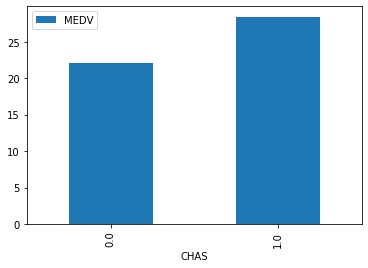

In [12]:
pivot.plot(kind='bar')#plot bar chart of pivot
plt.show()#show plot

We can see from the above bar chart that houses in neighbourhoods that are situated along the river have a higher price than those that are not. I wanted to further demonstrate the relationship between properties on the river and their price by isolating the values where site was denoted with a "1" in the CHAS column, and chose to do this using the [.loc function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) in Pandas to create a dataframe called "onriver", and then, using the [count function in Pandas](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.count.html) to ascertain how many houses in the dataset belong in this group. To ensure accuracy I thought it would be best to also create a "notonriver" dataframe, to provide confirmation that the entire dataset is represented. 

In [13]:
onriver = df1.loc[df['CHAS'] == 1]#create dataframe named onriver where entries in CHAS variable are 1
onriver.count()#perform count operation on the onriver dataframe

CHAS    35
MEDV    35
dtype: int64

In [14]:
notonriver = df1.loc[df['CHAS'] == 0]#create dataframe named notonriver where entries in CHAS variable are 0
notonriver.count()#perform count operation on the notonriver dataframe

CHAS    471
MEDV    471
dtype: int64

From these counts we can see that there are 35 suburbs in the dataset that bound the river and 471 that do not, totalling 506 areas as per the full dataset. 
To better understand if there are significant differences between the value of properties on the river and those that are not I wanted to plot the 2 distinct categories for median house price against each other -  

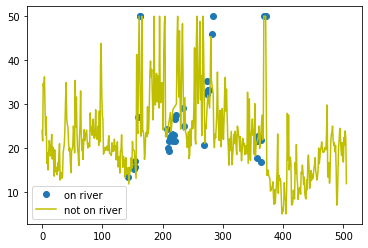

In [15]:
r = onriver['CHAS'] #isolating if houses are on river
t = onriver['MEDV'] #corresponding value for price of houses on river
p = notonriver['CHAS'] #isolating if houses are not on river
q = notonriver['MEDV'] #corresponding value for price of houses not on river
plt.plot(t,'o', label='on river')#plotting and labelling values for MEDV onriver in blue 
plt.plot(q, 'y', label='not on river')#plotting and labelling values for MEDV not on river in yellow
plt.legend()#display plot legend 
plt.show()#display plot

The above graph suggests that in some cases there is a significant difference in median prices for houses on the river, but that the majority of the data points denoting this condition are positioned in the middle of the graph, which suggests that proximity to the Charles river is not a clear indication of house value. However, the median and mean prices of the onriver dataset is higher than the median price of the notonriver dataset as the below code demonstrates - 

In [16]:
t.describe()#give summary statistics of median price of properties on the river

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

In [17]:
t.median()#give median of properties on the river

23.3

In [18]:
q.describe()#give summary statistics of properties not on the river

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [223]:
q.median()#give median house value of properties not on the river

20.9

### Linear Regression
Using the [linregress function from scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html?highlight=linear%20regression) it is possible to calcuate the linear least squares regression for the CHAS and MEDV variables, and in turn, plot the findings.

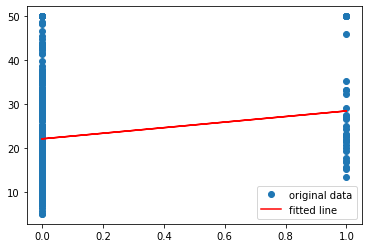

In [20]:
x = df['CHAS']#independent variable
y = df['MEDV']#dependent variable
# Get slope, intercept from linregress() to plot y' = intercept + slope*x
slope, intercept, r_value, p_value, std_err = ss.linregress(x, y)
#plot the data with fitted line
plt.plot(x, y,'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()#show legend
plt.show()#show plot 

As the above graph shows, the median value rises for properties that bound the river, as the slope of the line represents the increasing MEDV attribute along the x axis, therefore proving the increase in price.  

### Independent T-test
It may be the case that an [independent t-test](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php) could be a good interpretation of any statistical significance between the "onriver" and "notonriver" data sets.  This test is used to test [for a significant difference between the mean of two independent (unrelated) groups](https://pythonfordatascience.org/independent-t-test-python/) and proposes the null hypothesis that the mean of sample 1 is equal to the mean of sample 2 and that therefore, there is no statistically significant difference. This can be tested using the [independent t-test function available in scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), which will return both the calculated t-statistic and the two-tailed p-value. The t-statistic is ["the ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups"](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f). A p-value ["is the probability of getting a result as or more extreme than the sample result by random chance alone"](https://www.khanacademy.org/math/ap-statistics/tests-significance-ap/idea-significance-tests/v/p-values-and-significance-tests).

For t-testing to be valid, it is important that the data being tested meets [6 assumptions](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php) and in this case, I'm unsure that the "onriver" and "notonriver" variables meet the last 3 assumptions in the list, namely - 

**Assumption 4 (Check there are "no significant outliers" in your data that could negatively influence your results)**

**Assumption 5 (Check that your dependent variable is "approximately normally distributed" for each category of your independent variable)**

**Assumption 6 (Check that there are homogeneity of variances)**

It is necessary to perform some preliminary observations before carrying out a t-test and the first will be to check for significant outliers in the data. Laerd Statistics recommends using boxplots for this - 

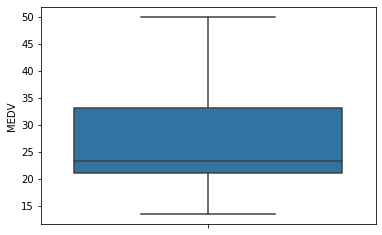

In [21]:
#plots boxplot of prices of properties on the river 
sns.boxplot(t, orient='v')

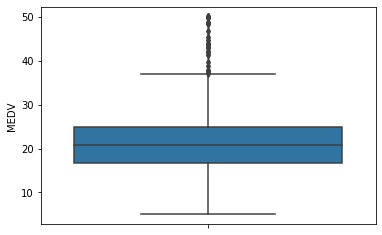

In [22]:
#plots boxplot of prices of properties not on the river
sns.boxplot(q, orient='v')

We can see from the above boxplots that the data representing properties not on the river has outliers in the top quartile, which confirms that the data fails to meet Assumption 4 for independent t-testing.

We have already seen from the histograms generated in the pairplots above that the MEDV variable is approximately normally distributed. Laerd Statistics recommends the [Shapiro Wilk](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) test of normality to test the distribution and determine if it is normal or not.  I found an [excellent article by Jason Brownlee on his Machine Learning Mastery blog](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/) that details how to use this test and how to interpret the results - 

In [23]:
stat, p = ss.shapiro(t) #use scipy stats' shapiro function to perform Shapiro Wilk test and define results as 'stat' and 'p'
print('Statistics=%.3f, p=%.3f' % (stat, p))#print results of Shapiro Wilk test as 'Statistics' and 'p'

Statistics=0.836, p=0.000


In [24]:
alpha = 0.05 #sets alpha variable to 0.05 in order to compare with p-value result to determine if distribution is normal
if p > alpha: #if statement to compare p-value result with alpha variable ((i.e. if p value is more than 0.05 the distribution is normal))
    print('Sample looks Gaussian (fail to reject H0)')# if p is greater than alpha after comparison print statement failing to reject hypothesis
else:#if result does not meet former condition (i.e. if p value is less than 0.05 the distribution is not normal)
    print('Sample does not look Gaussian (reject H0)')#print this statement 

Sample does not look Gaussian (reject H0)


In [25]:
stat, p1 = ss.shapiro(q)#use scipy stats' shapiro function to perform Shapiro Wilk test and define results as 'stat' and 'p1'
print('Statistics=%.3f, p1=%.3f' % (stat, p1))#print results of Shapiro Wilk test as 'Statistics' and 'p1'

Statistics=0.928, p1=0.000


In [26]:
alpha = 0.05#sets alpha variable to 0.05 in order to compare with p-value result to determine if distribution is normal
if p1 > alpha:#if statement to compare p-value result with alpha variable (i.e. if p value is more than 0.05 the distribution is normal)
    print('Sample looks Gaussian (fail to reject H0)')# if p is greater than alpha after comparison print statement failing to reject hypothesis
else:#if result does not meet former condition (i.e. if p value is less than 0.05 the distribution is not normal)
    print('Sample does not look Gaussian (reject H0)')#print this statement

Sample does not look Gaussian (reject H0)


As the above tests show, neither sample is drawn from a normal distribution so the data does not meet Assumption 5 for valid t-testing. 

Lastly, we can carry out [Levene's test for equal variances](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html) on the onriver and notonriver variables to check if they satisfy Assumption 6.  My understanding of the result from this test is that ["resulting p-value under 0.05 means that variances are not equal and that further parametric tests such as ANOVA are not suited"](https://biostats.w.uib.no/test-for-homogeneity-of-variances-levenes-test/).  On this basis I decided to use code similar to Jason Brownlee's used above to determine the result - 

In [27]:
stat, p2 = ss.levene(t, q)#use scipy stats' levene function to perform Levene's test and define results as 'stat' and 'p1'
print('Statistics=%.3f, p2=%.3f' % (stat, p2))#prints result

Statistics=4.590, p2=0.033


In [28]:
alpha = 0.05 #sets alpha variable to 0.05 in order to compare with p-value result to determine if variances are equal
if p2 < alpha: #if statement to compare p-value result with alpha (i.e if p-value is less than alpha variances are not equal)
    print('P-value is less than 0.05, variances are not equal')
else:
    print('P-value is more than 0.05, variances are equal')

P-value is less than 0.05, variances are not equal


As the above result from Levene's test shows, the variances are not equal and in this case, ANOVA is not an appropriate test to perform on these variables.   As these variances are unequal, [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) may be a more appropriate statistical test. On referring back to the Scipy Stats documentation I noticed that it is possible to perform this type of test with the earlier referenced independent t-test function but with the parameter for **"equal_var"** set to **"False"**.  I decided to test this out with the onriver and notonriver variables -  

In [29]:
#use scipy stats' independent t_test function to perform Welch's t-test and define results as 'stat' and 'p1'
stat, p3 = ss.ttest_ind(t,q, equal_var=False)
print('Statistics=%.3f, p3=%.3f' % (stat, p3))

Statistics=3.113, p3=0.004


In [30]:
alpha = 0.05 #sets alpha variable to 0.05 in order to compare with p-value result to determine if variances are equal
if p3 < alpha: #if statement to compare p-value result with alpha (i.e if p-value is less than alpha variances are not equal)
    print('P-value is less than 0.05')
else:
    print('P-value is more than 0.05')

P-value is less than 0.05


We can see that Welch's T-test with equal variances set to 'false' yields a lower p-value which can allow us to infer that there is some statistical significance between the onriver and notonriver variables. 

# Predict

In Machine Learning, [neural networks](https://en.wikipedia.org/wiki/Neural_network) are sets of computer algorithms that are designed to replicate the functions of biological circuits of neurons in a simplified way. Their purpose is to recognise patterns and they can be trained with numerical datsets to interpret, learn and subsequently make predictions based on these patterns. Neural networks can be used for among other things, image processing and recognition, data validation, financial and economic forecasting and industrial diagnostic systems.

Each neural network is comprised of connections of many units called neurons, or nodes, that receive inputs from each other in order to build a mathematical model and compute an output. Every neuron in the network ["has an associated
weight, which is assigned on the basis of its relative importance to other inputs"](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc) which adjust during execution of the algorithm to recognise patterns and maintain accuracy of prediction.

For this assignment, I will use the [Keras](https://keras.io/) deep learning library for Python (imported as kr) to build layers of neurons with the [Sequential model](https://keras.io/getting-started/sequential-model-guide/).  Keras incorporates Theano and TensorFlow through its backend, both mathematical machine learning platforms, and allows for less complex user engagement through its high level frontend API (application programming interface). 

To begin with, I will scale the data using [Sci-Kit Learn's Preprocessing package](https://scikit-learn.org/stable/modules/preprocessing.html) and then split the dataset into input variables (which are fed to the learning algorithm to train it) and an output variable (which is the predictive data we want the algorithm to produce), in this case, the median house price variable.  The [Scickit Learn maching learning library offers a preprocessing data function](https://scikit-learn.org/stable/modules/preprocessing.html) which transforms and standardises data to a representation that is better handled by the learning algorithm. In effect, it scales outliers and pre-processes the training set into a normalised distribution, and ensures more accuracy in prediction by streamlining the variance of the features, as variables with larger variances might "dominate the objective function and make the estimator unable to learn from other features correctly as expected". It is a recommended pre-processing step when constructing neural networks. 

Then, I will construct a neural network with the split data to attempt to predict the median house price. This is where the Sequential model will be used. This model is a linear stack of layers that are created in sequence.  The first layer must specify the shape of the input passed as an argument, subsequent layers can automatically infer the shape. As there are 13 variables in the training subset this is specified with a dimension size of 13 and a layer type of Dense (which ensures ["all nodes in the previous layer connect to the nodes in the current layer"](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37).  The input layer accepts this information and in turn, passes this to the [hidden layer](https://www.techopedia.com/definition/33264/hidden-layer-neural-networks) where weights and biases are applied stochastically (not visible to the user) which then passes the computed result outputted from the neurons to the output layer, using an activation function.  For this, an activation function must be provided. After some research into activation functions I decided to use ["ReLU"](https://www.tinymind.com/learn/terms/relu) (or "Rectified Linear Unit") for this as it is the most widely used and therefore a good choice if unsure what function to use. It is a linear function which means....The output layer has only 1 node for prediction.

**The next step is to apply the compile method to the model which accepts 2 parameters - optimizer and loss. The compile method configures the model for training, the optimizer function applies and modifies the learning rate and the loss function.**   

Keras converts this data to NumPy arrays for training using the [fit() function](https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/).  The epoch amount and batch size need to be defined here, epoch being the number of times the model is exposed to the training set and batch size being the number of training instances shown to the model before a weight update is performed.

For the sake of comparison I will pre-process the original data with a different function to see if there is any difference in accuracy of prediction. As part of its [Decomposition module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition), Sci-Kit Learn offers another pre-processing function called [Principle Component Analyis, or PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn-decomposition-pca). The purpose of this function is to centre (not scale) the data and ["convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components"](https://en.wikipedia.org/wiki/Principal_component_analysis). It works by taking a number of components - in this case, the 13 variables for training - and applying a fit to the data with an option to "whiten" it. Whitening transforms the uncorrelated data to ["each have a variance of 1"](https://en.wikipedia.org/wiki/Whitening_transformation) which can, according to the Sci-Kit Learn documentation, improve the predictive accuracy of the downstream estimators.  

Finally, I will evaluate the predictions made by the neural network to determine its level of accuracy by comparing the output with the original data and plotting graphs depicting each output versus the original data.

### Scaling the data and building a model


In [201]:
#split the dataset into input variables (x) and output variable (y)
x = df.iloc[:, 0:13] #selects first 13 columns of dataset
y = pd.DataFrame(df.iloc[:,13]) #selects target variable and uses DataFrame wrapper to convert it from series to dataframe

#define train and test models and size of test data
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.1)

#defines scaler function imported from Sci-Kit Learn
scaler = pre.StandardScaler()
#applies scaler to training model
scaler.fit(x_train)
#defines new DataFrame object of scaled data
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)

#create a neural network and configure model for training 
#call Sequential model
m = kr.models.Sequential()
#build input layers with 100 layers of neurons, an input dimension size of 13 and an activation function of "relu"
m.add(kr.layers.Dense(units=100, input_dim=(13), activation='relu'))
m.add(kr.layers.Dense(units=100, input_dim=(13), activation='relu'))
#build output layer with dimension size of 1 and an activation function of 'linear'
m.add(kr.layers.Dense(units=1, input_dim=(1), activation='linear'))
#compile the network with a loss function of MSE and an optimizer of adam
m.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy'])

#train the model with scaled data 
m.fit(x_train_scaled, y_train, epochs=150, batch_size=10)

Epoch 1/150
455/455 [==============================] - 1s 2ms/step - loss: 469.9913 - accuracy: 0.0000e+00
Epoch 2/150
455/455 [==============================] - 0s 276us/step - loss: 113.6252 - accuracy: 0.0110
Epoch 3/150
455/455 [==============================] - 0s 279us/step - loss: 31.8920 - accuracy: 0.0088
Epoch 4/150
455/455 [==============================] - 0s 277us/step - loss: 21.8513 - accuracy: 0.0132
Epoch 5/150
455/455 [==============================] - 0s 286us/step - loss: 18.6449 - accuracy: 0.0110
Epoch 6/150
455/455 [==============================] - 0s 297us/step - loss: 16.8576 - accuracy: 0.0154
Epoch 7/150
455/455 [==============================] - 0s 267us/step - loss: 15.4349 - accuracy: 0.0176
Epoch 8/150
455/455 [==============================] - 0s 283us/step - loss: 13.9637 - accuracy: 0.0220
Epoch 9/150
455/455 [==============================] - 0s 391us/step - loss: 13.3904 - accuracy: 0.0264
Epoch 10/150
455/455 [==============================] - 0s 2

455/455 [==============================] - 0s 372us/step - loss: 3.3083 - accuracy: 0.0198
Epoch 80/150
455/455 [==============================] - 0s 331us/step - loss: 3.2601 - accuracy: 0.0330
Epoch 81/150
455/455 [==============================] - 0s 272us/step - loss: 3.3956 - accuracy: 0.0352
Epoch 82/150
455/455 [==============================] - 0s 291us/step - loss: 3.2273 - accuracy: 0.0374
Epoch 83/150
455/455 [==============================] - 0s 306us/step - loss: 2.9222 - accuracy: 0.0352
Epoch 84/150
455/455 [==============================] - 0s 308us/step - loss: 2.9933 - accuracy: 0.0330
Epoch 85/150
455/455 [==============================] - 0s 281us/step - loss: 2.9833 - accuracy: 0.0264
Epoch 86/150
455/455 [==============================] - 0s 286us/step - loss: 2.8971 - accuracy: 0.0286
Epoch 87/150
455/455 [==============================] - 0s 299us/step - loss: 2.8877 - accuracy: 0.0286
Epoch 88/150
455/455 [==============================] - 0s 275us/step - loss:

### Evaluate

In [202]:
#use Keras' evaulate function to ascertain accuracy
m.evaluate(x_train_scaled, y_train)

455/455 [==============================] - 0s 323us/step


[1.5626940190137089, 0.050549451261758804]

### Making predictions

In [212]:
#https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/?cn-reloaded=1
to_predict = x_train_scaled
# we call the predict method
predictions = m.predict(to_predict)
#convert to Pandas DataFrame for easier manipulation
output = pd.DataFrame(predictions)

### Results

In [224]:
#create variable called results that concatenates inputs, outputs and predicted data 
results = pd.concat([x, y, output], axis=1)
#show results 
results

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,22.273302
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.180790
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,20.342033
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,18.576586
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,18.529087
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,24.595928
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,22.529675
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,10.310130
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,13.773225
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,17.403915


### Whitening the Data

In [205]:
#importing Decomposition module for whitening data
import sklearn.decomposition as dec
#defining PCA function to accept 13 components and applying whitening
pca = dec.PCA(n_components=13, whiten=True)
#applying PCA to training subset
pca.fit(x_train)
#creating new DataFrame of whitened data based on training subset
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
#refitting model with whitened data
m.fit(x_train_white, y_train, epochs=150, batch_size=10)


Epoch 1/150
455/455 [==============================] - 0s 251us/step - loss: 58.5982 - accuracy: 0.0132
Epoch 2/150
455/455 [==============================] - 0s 279us/step - loss: 16.5130 - accuracy: 0.0110
Epoch 3/150
455/455 [==============================] - 0s 259us/step - loss: 11.9458 - accuracy: 0.0330
Epoch 4/150
455/455 [==============================] - 0s 284us/step - loss: 10.1133 - accuracy: 0.0176
Epoch 5/150
455/455 [==============================] - 0s 305us/step - loss: 8.8481 - accuracy: 0.0242
Epoch 6/150
455/455 [==============================] - 0s 270us/step - loss: 8.0458 - accuracy: 0.0176
Epoch 7/150
455/455 [==============================] - 0s 276us/step - loss: 7.1288 - accuracy: 0.0242
Epoch 8/150
455/455 [==============================] - 0s 269us/step - loss: 6.6924 - accuracy: 0.0176
Epoch 9/150
455/455 [==============================] - 0s 289us/step - loss: 5.8410 - accuracy: 0.0242
Epoch 10/150
455/455 [==============================] - 0s 281us/step

455/455 [==============================] - 0s 284us/step - loss: 0.8556 - accuracy: 0.0879
Epoch 79/150
455/455 [==============================] - 0s 305us/step - loss: 0.8414 - accuracy: 0.0440
Epoch 80/150
455/455 [==============================] - 0s 266us/step - loss: 0.7381 - accuracy: 0.0681
Epoch 81/150
455/455 [==============================] - 0s 315us/step - loss: 0.7309 - accuracy: 0.0879
Epoch 82/150
455/455 [==============================] - 0s 291us/step - loss: 0.5955 - accuracy: 0.0791
Epoch 83/150
455/455 [==============================] - 0s 284us/step - loss: 0.6045 - accuracy: 0.0747
Epoch 84/150
455/455 [==============================] - 0s 301us/step - loss: 0.8016 - accuracy: 0.0615
Epoch 85/150
455/455 [==============================] - 0s 297us/step - loss: 0.6878 - accuracy: 0.0857
Epoch 86/150
455/455 [==============================] - 0s 304us/step - loss: 0.7076 - accuracy: 0.0681
Epoch 87/150
455/455 [==============================] - 0s 302us/step - loss:

### Evaluate

In [213]:
#evaluating model trained with whitened data
m.evaluate(x_train_white, y_train)

455/455 [==============================] - 0s 53us/step


[0.24505257049759666, 0.10549450665712357]

### Making predictions

In [215]:
#https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/?cn-reloaded=1
to_predict1 = x_train_white
# we call the predict method
predictions1 = m.predict(to_predict1)
#convert to Pandas DataFrame for easier manipulation
output1 = pd.DataFrame(predictions1)

### Results

In [225]:
results1 = pd.concat([x, y, output1], axis=1)
results1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,22.458954
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,24.653555
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,42.764282
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,44.410248
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,37.633701
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,19.525227
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,20.468012
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,13.291625
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,13.953910
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,13.475171


### Visualising 

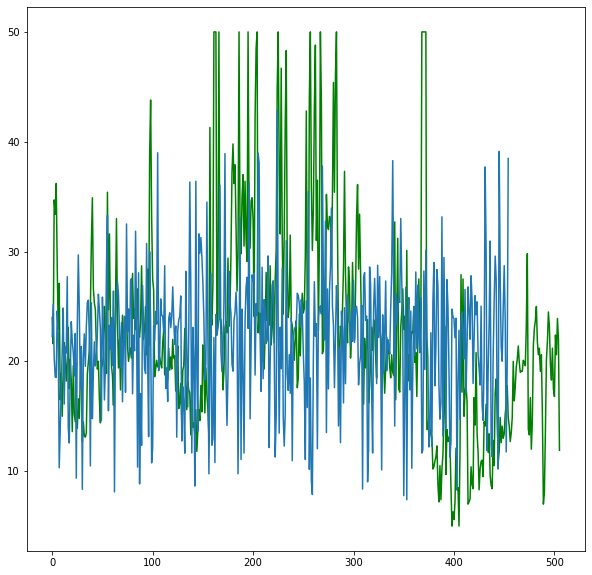

In [220]:
plt.rcParams['figure.figsize'] = (10, 10)#increases width and length of plot
plt.plot(y, 'g')#plots original MEDV data in green
plt.plot(output)#plots predicted output from scaled data 

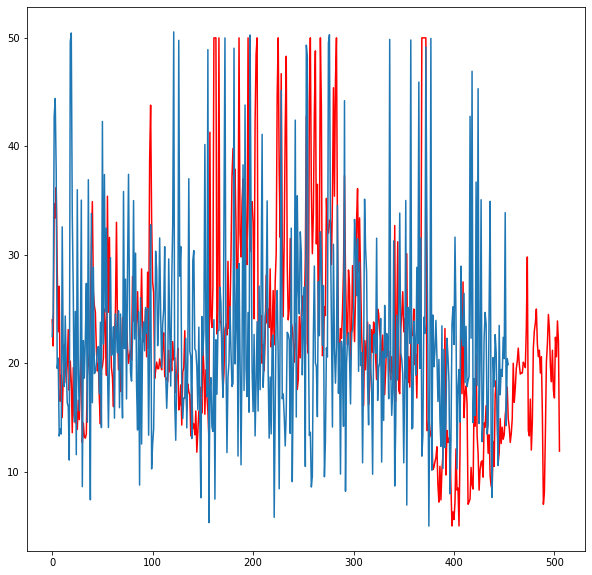

In [218]:
plt.plot(y, 'r') #plots original data in red
plt.plot(output1) #plots predicted data from whitened data

## References

1. https://www.kaggle.com/c/boston-housing
2. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
4. http://www.neural.cz/dataset-exploration-boston-house-pricing.html
5. https://en.wikipedia.org/wiki/Descriptive_statistics
6. https://www.kaggle.com/shreayan98c/boston-house-price-prediction
7. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
8. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
9. https://seaborn.pydata.org/generated/seaborn.pairplot.html
10. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.describe.html?highlight=descriptive
11. https://www.investopedia.com/terms/k/kurtosis.asp
12. https://whatis.techtarget.com/definition/skewness
13. https://www.investopedia.com/terms/v/variance.asp
14. https://www.mymarketresearchmethods.com/descriptive-inferential-statistics-difference/
15. https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4
16. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
17. https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.count.html
18. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html?highlight=linear%20regression
19. https://statistics.laerd.com/statistical-guides/types-of-variable.php
20. https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
21. https://pythonfordatascience.org/independent-t-test-python/
22. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
23. https://pythonfordatascience.org/anova-python/
24. https://en.wikipedia.org/wiki/Neural_network
25. https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc
26. https://keras.io/
27. https://keras.io/getting-started/sequential-model-guide/
28. https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/
29. https://scikit-learn.org/stable/modules/preprocessing.html

## End